## SoyBean

In [27]:
# @title Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### SoyBean Preprocessing

In [ ]:
!wget https://archive.ics.uci.edu/static/public/90/soybean+large.zip
!unzip soybean+large.zip

--2025-05-02 06:00:15--  https://archive.ics.uci.edu/static/public/90/soybean+large.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘soybean+large.zip’

soybean+large.zip       [ <=>                ]  22.77K  --.-KB/s    in 0.06s   

2025-05-02 06:00:15 (360 KB/s) - ‘soybean+large.zip’ saved [23316]



In [ ]:
# !diff soybean-large.data backup-large.data

In [ ]:
# @title Convert Processed SET to CSV
import csv

with open('backup-large.data') as f:
    train_set_lines = f.readlines()
list_lists_train = [line.split(',') for line in train_set_lines]

with open('train_set.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(list_lists_train)

In [ ]:
# @title Convert Unprocessed SET to CSV

with open('backup-large.test') as f:
    test_set_lines = f.readlines()
list_lists_test = [line.split(',') for line in test_set_lines]

with open('test_set.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(list_lists_test)

In [ ]:
# @title Convert Processed SET to CSV

with open('soybean-large.data') as f:
    train_set_lines = f.readlines()
list_lists_train = [line.split(',') for line in train_set_lines]

with open('train_set_unprocessed.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(list_lists_train)

with open('soybean-large.test') as f:
    test_set_lines = f.readlines()
list_lists_test = [line.split(',') for line in test_set_lines]

with open('test_set_unprocessed.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(list_lists_test)

In [ ]:
!cp train_set.csv test_set.csv train_set_unprocessed.csv test_set_unprocessed.csv /content/drive/MyDrive/

In [ ]:
# @title Save Attribute Values (copy manually)
!touch attribute_values.txt
!cp attribute_values.txt /content/drive/MyDrive/
with open('attribute_values.txt') as f:
    attribute_values = f.readlines()
attribute_values_lines = [line.strip() for line in attribute_values]
attribute_values_lines[2]

In [ ]:
# @title Create Processed Attribute Values
import re
import json

attribute_name_values = dict()
attribute_names = ['category']
for line in attribute_values_lines:
    # print(line)
    splitted_over_colon = line.split(':')
    attribute_name = re.search('\d+\\.\s*(.*)', splitted_over_colon[0]).group(1)
    print(attribute_name)
    attribute_values = splitted_over_colon[1].strip()[:-1].split(',')
    print(attribute_values)
    attribute_name_values[attribute_name] = attribute_values

    attribute_names.append(attribute_name)

with open('attribute_name_values.json', 'w') as f:
    json.dump(attribute_name_values, f)

!cp attribute_name_values.json /content/drive/MyDrive/Expert_Systems/

date
['april', 'may', 'june', 'july', 'august', 'september', 'october', '?']
plant-stand
['normal', 'lt-normal', '?']
precip
['lt-norm', 'norm', 'gt-norm', '?']
temp
['lt-norm', 'norm', 'gt-norm', '?']
hail
['yes', 'no', '?']
crop-hist
['diff-lst-year', 'same-lst-yr', 'same-lst-two-yrs', 'same-lst-sev-yrs', '?']
area-damaged
['scattered', 'low-areas', 'upper-areas', 'whole-field', '?']
severity
['minor', 'pot-severe', 'severe', '?']
seed-tmt
['none', 'fungicide', 'other', '?']
germination
['90-100%', '80-89%', 'lt-80%', '?']
plant-growth
['norm', 'abnorm', '?']
leaves
['norm', 'abnorm']
leafspots-halo
['absent', 'yellow-halos', 'no-yellow-halos', '?']
leafspots-marg
['w-s-marg', 'no-w-s-marg', 'dna', '?']
leafspot-size
['lt-1/8', 'gt-1/8', 'dna', '?']
leaf-shread
['absent', 'present', '?']
leaf-malf
['absent', 'present', '?']
leaf-mild
['absent', 'upper-surf', 'lower-surf', '?']
stem
['norm', 'abnorm', '?']
lodging
['yes', 'no', '?']
stem-cankers
['absent', 'below-soil', 'above-soil', 

In [ ]:
# @title Add Index to Columns
import pandas as pd
#####################################################
df = pd.read_csv('train_set_unprocessed.csv')
df.columns = attribute_names
# Save with row names
df.to_csv('train_set_unprocessed_with_index.csv', index=True)
#####################################################
df = pd.read_csv('train_set.csv')
df.columns = attribute_names
# Save with row names
df.to_csv('train_set_with_index.csv', index=True)
#####################################################
df = pd.read_csv('test_set_unprocessed.csv')
df.columns = attribute_names
# Save with row names
df.to_csv('test_set_unprocessed_with_index.csv', index=True)
#####################################################
df = pd.read_csv('test_set.csv')
df.columns = attribute_names
# Save with row names
df.to_csv('test_set_with_index.csv', index=True)

In [ ]:
!cp train_set_unprocessed_with_index.csv test_set_unprocessed_with_index.csv train_set_with_index.csv test_set_with_index.csv /content/drive/MyDrive/Expert_Systems/

### SoyBean Analysis

In [ ]:
# @title Fetch Train and Test Datasets Processed with Index from the Drive
%%shell
gdown --id 1-9dIHzrWT2IS7ZAvAbP2olclDnYlGSi- # test_set_with_index.csv
gdown --id 1-CWWlqfHMnjbe2vik9pauLjlN__yR7Mx # train_set_with_index.csv
# gdown --id 1UjOSwyEOTEdRbg2cwzGj9ysO1qVqZ1sT # train_set.csv
# gdown --id 1tWzEaxAOLf7GWJ_jk3O6n0vLL0I8DMG8 # test_set.csv
# gdown --id 1-XgW_xglKMvkmX30Pwm3kFnnwKhrBOIe # test_set_unprocessed_with_index.csv
# gdown --id 1-1bSknlCDfXLxpR5LxRektwqQN-uqpAH # test_set_unprocessed.csv
# gdown --id 1-dcrjtuRbpzYrb3p-hR7jeZ6-VOs1W7n # train_set_unprocessed_with_index.csv
# gdown --id 1-1cf36CmNI5euBAJ4z5uWj61fKC07yGe # train_set_unprocessed.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-9dIHzrWT2IS7ZAvAbP2olclDnYlGSi-
To: /content/test_set_with_index.csv
100% 35.9k/35.9k [00:00<00:00, 64.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-CWWlqfHMnjbe2vik9pauLjlN__yR7Mx
To: /content/train_set_with_index.csv
100% 28.8k/28.8k [00:00<00:00, 47.0MB/s]


In [ ]:
# @title Load CSV and preprocess
import pandas as pd

# Load your data
df = pd.read_csv('train_set_with_index.csv', index_col=0)

# Replace missing values or custom missing markers (e.g., '?', '-1')
df.replace(['?', -1], pd.NA, inplace=True)
df.dropna(inplace=True)  # Drop rows with missing values (or use imputation)

# Separate features and labels
X = df.drop(columns=['category'])  # Replace with your actual target column
y = df['category']

In [ ]:
# @title Train Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
# @title Print Decision Tree Rules
from sklearn.tree import export_text

# Get decision rules
feature_names = X.columns.tolist()
rules_dt = export_text(clf, feature_names=feature_names)
print(rules_dt)


|--- leafspots-marg <= 0.50
|   |--- leafspot-size <= 0.50
|   |   |--- canker-lesion <= 1.50
|   |   |   |--- roots <= 0.50
|   |   |   |   |--- class: bacterial-blight
|   |   |   |--- roots >  0.50
|   |   |   |   |--- class: bacterial-pustule
|   |   |--- canker-lesion >  1.50
|   |   |   |--- class: purple-seed-stain
|   |--- leafspot-size >  0.50
|   |   |--- date <= 3.50
|   |   |   |--- precip <= 1.50
|   |   |   |   |--- temp <= 0.50
|   |   |   |   |   |--- class: brown-stem-rot
|   |   |   |   |--- temp >  0.50
|   |   |   |   |   |--- class: phyllosticta-leaf-spot
|   |   |   |--- precip >  1.50
|   |   |   |   |--- seed <= 0.50
|   |   |   |   |   |--- class: brown-spot
|   |   |   |   |--- seed >  0.50
|   |   |   |   |   |--- class: downy-mildew
|   |   |--- date >  3.50
|   |   |   |--- stem <= 0.50
|   |   |   |   |--- leaf-mild <= 1.00
|   |   |   |   |   |--- class: alternarialeaf-spot
|   |   |   |   |--- leaf-mild >  1.00
|   |   |   |   |   |--- class: downy-milde

In [ ]:
# @title Deprecated Decision Tree Processing
# def process_dt(dt_heirarchy):
#   rule_traversed = []
#   all_rules = []
#   dt_nodes = dt_heirarchy.split('\n')
#   i = 0
#   prev_level = 0
#   for node in dt_nodes:
#     # print(node)
#     if (not node): continue
#     level = len(re.findall('\|   ', node))
#     # print(level)
#     if (prev_level > level):
#       diff = prev_level - level
#       while(diff != 0):
#        rule_traversed.pop()
#        diff -= 1
#     prev_level = level
#     try:
#       node_info = re.search('\w+.*', node).group(0)
#     except:
#       print(node)
#       raise Exception('Invalid node')
#     # print(node_info)

#     if (node_info.startswith('class:')):
#       new_rule = 'IF ' + ' AND '.join(rule_traversed)
#       new_rule += ' THEN ' + node_info.replace('class: ', 'category=')
#       all_rules.append(new_rule)
#       # new_rule = re

#     rule_traversed.append(node_info)
#     # i += 1
#     # if (i == 12): break
#   return all_rules

# all_dt_rules = process_dt(rules_dt)


In [ ]:
# @title Process Decision Tree LLM fixed
import re

def process_dt(dt_hierarchy):
    rule_traversed = []
    all_rules = []
    dt_nodes = dt_hierarchy.split('\n')
    prev_level = 0

    for node in dt_nodes:
        if not node.strip():
            continue

        # Count the level of indentation
        level = len(re.findall(r'\|   ', node))

        # If we're moving back up the tree, pop conditions from the stack
        if prev_level > level:
            diff = prev_level - level
            while diff > 0:
                rule_traversed.pop()
                diff -= 1

        prev_level = level

        try:
            node_info = re.search(r'\w+.*', node).group(0)
        except:
            print(f"Error parsing node: {node}")
            raise Exception('Invalid node')

        # Check if this is a leaf node (class)
        if node_info.startswith('class:'):
            # Form the rule with conditions we've collected
            if rule_traversed:
                new_rule = 'IF ' + ' AND '.join(rule_traversed)
                new_rule += ' THEN ' + node_info.replace('class: ', 'category="')
                new_rule += '"'  # Add closing quote for category value
                all_rules.append(new_rule)
        else:
            # This is a condition node - parse it properly
            condition = node_info.strip()
            if '<=' in condition or '>' in condition:
                # Format the condition for better readability
                # Example: "leafspots-marg <= 0.50" becomes "leafspots-marg <= 0.50"
                rule_traversed.append(condition)

    return all_rules

# Test with your full decision tree
dt_rules = """
|--- leafspots-marg <= 0.50
|   |--- leafspot-size <= 0.50
|   |   |--- canker-lesion <= 1.50
|   |   |   |--- roots <= 0.50
|   |   |   |   |--- class: bacterial-blight
|   |   |   |--- roots >  0.50
|   |   |   |   |--- class: bacterial-pustule
|   |   |--- canker-lesion >  1.50
|   |   |   |--- class: purple-seed-stain
|   |--- leafspot-size >  0.50
|   |   |--- date <= 3.50
|   |   |   |--- precip <= 1.50
|   |   |   |   |--- temp <= 0.50
|   |   |   |   |   |--- class: brown-stem-rot
|   |   |   |   |--- temp >  0.50
|   |   |   |   |   |--- class: phyllosticta-leaf-spot
|   |   |   |--- precip >  1.50
|   |   |   |   |--- seed <= 0.50
|   |   |   |   |   |--- class: brown-spot
|   |   |   |   |--- seed >  0.50
|   |   |   |   |   |--- class: downy-mildew
|   |   |--- date >  3.50
|   |   |   |--- stem <= 0.50
|   |   |   |   |--- leaf-mild <= 1.00
|   |   |   |   |   |--- class: alternarialeaf-spot
|   |   |   |   |--- leaf-mild >  1.00
|   |   |   |   |   |--- class: downy-mildew
|   |   |   |--- stem >  0.50
|   |   |   |   |--- fruit-pods <= 0.50
|   |   |   |   |   |--- class: brown-spot
|   |   |   |   |--- fruit-pods >  0.50
|   |   |   |   |   |--- class: frog-eye-leaf-spot
|--- leafspots-marg >  0.50
|   |--- stem-cankers <= 0.50
|   |   |--- int-discolor <= 0.50
|   |   |   |--- leaf-mild <= 0.50
|   |   |   |   |--- leafspot-size <= 1.00
|   |   |   |   |   |--- class: bacterial-pustule
|   |   |   |   |--- leafspot-size >  1.00
|   |   |   |   |   |--- class: purple-seed-stain
|   |   |   |--- leaf-mild >  0.50
|   |   |   |   |--- class: powdery-mildew
|   |   |--- int-discolor >  0.50
|   |   |   |--- sclerotia <= 0.50
|   |   |   |   |--- class: brown-stem-rot
|   |   |   |--- sclerotia >  0.50
|   |   |   |   |--- class: charcoal-rot
|   |--- stem-cankers >  0.50
|   |   |--- fruit-pods <= 2.00
|   |   |   |--- fruit spots <= 3.00
|   |   |   |   |--- class: anthracnose
|   |   |   |--- fruit spots >  3.00
|   |   |   |   |--- class: diaporthe-stem-canker
|   |   |--- fruit-pods >  2.00
|   |   |   |--- leaves <= 0.50
|   |   |   |   |--- class: rhizoctonia-root-rot
|   |   |   |--- leaves >  0.50
|   |   |   |   |--- class: phytophthora-rot
"""

# Function to display the rules in a nicely formatted way
def display_rules(rules):
    print(f"Generated {len(rules)} IF-THEN rules from the decision tree:\n")
    for i, rule in enumerate(rules, 1):
        print(f"Rule {i}:")
        print(f"  {rule}")
        print()

# Process the decision tree and display the rules
all_dt_rules = process_dt(dt_rules)
# display_rules(all_dt_rules)
print(all_dt_rules)

# To use in your code:
# all_dt_rules = process_dt(rules_dt)

['IF leafspots-marg <= 0.50 AND leafspot-size <= 0.50 AND canker-lesion <= 1.50 AND roots <= 0.50 THEN category="bacterial-blight"', 'IF leafspots-marg <= 0.50 AND leafspot-size <= 0.50 AND canker-lesion <= 1.50 AND roots >  0.50 THEN category="bacterial-pustule"', 'IF leafspots-marg <= 0.50 AND leafspot-size <= 0.50 AND canker-lesion >  1.50 THEN category="purple-seed-stain"', 'IF leafspots-marg <= 0.50 AND leafspot-size >  0.50 AND date <= 3.50 AND precip <= 1.50 AND temp <= 0.50 THEN category="brown-stem-rot"', 'IF leafspots-marg <= 0.50 AND leafspot-size >  0.50 AND date <= 3.50 AND precip <= 1.50 AND temp >  0.50 THEN category="phyllosticta-leaf-spot"', 'IF leafspots-marg <= 0.50 AND leafspot-size >  0.50 AND date <= 3.50 AND precip >  1.50 AND seed <= 0.50 THEN category="brown-spot"', 'IF leafspots-marg <= 0.50 AND leafspot-size >  0.50 AND date <= 3.50 AND precip >  1.50 AND seed >  0.50 THEN category="downy-mildew"', 'IF leafspots-marg <= 0.50 AND leafspot-size >  0.50 AND date

In [ ]:
print(len(all_dt_rules))

20


In [ ]:
with open('learned_dt_rules.txt', 'w') as f:
    # rules = f.readlines()
    all_dt_rules_str = '\n'.join(all_dt_rules)
    f.write(all_dt_rules_str)

In [ ]:
!cp learned_dt_rules.txt /content/drive/MyDrive/Expert_Systems/

In [ ]:
# @title Install Numpy compatible with Orange (CN2 Rule learning)
!pip install -qqq numpy==1.23.5 --force-reinstall

In [ ]:
!pip install -qqq orange3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.6/534.6 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.2/270.2 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/

In [ ]:
# @title Apply CN2 using Orange
import pandas as pd
import Orange
from Orange.data import Domain, DiscreteVariable, ContinuousVariable, StringVariable, Table
import numpy as np

# Load your dataset
df = pd.read_csv("train_set_with_index.csv", index_col=0)

# Let's examine the structure of our dataset
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Category values: {df['category'].unique()}")
print("\nColumn data types:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Sample: {df[col].iloc[0]}")

# Check if there are any string features that need to be converted
# Orange works best when categorical/string features are properly encoded
categorical_features = []
continuous_features = []

for col in df.columns:
    if col == 'category':
        continue

    # Check if column has string values
    if df[col].dtype == 'object':
        print(f"Converting {col} to categorical")
        categorical_features.append(col)
    else:
        continuous_features.append(col)

# Convert any string features to numerical if needed
for col in categorical_features:
    # Create mapping of unique values to integers
    unique_vals = df[col].unique()
    val_map = {val: i for i, val in enumerate(unique_vals)}
    df[col] = df[col].map(val_map)

# Create Orange domain with proper variable types
feature_vars = []
for col in df.columns:
    if col == 'category':
        continue

    if col in categorical_features:
        # For categorical features, create discrete variables
        unique_vals = sorted([str(v) for v in df[col].unique()])
        feature_vars.append(DiscreteVariable(col, values=unique_vals))
    else:
        # For numerical features
        feature_vars.append(ContinuousVariable(col))

# Create target variable
target_values = sorted([str(v) for v in df['category'].unique()])
target_var = DiscreteVariable('category', values=target_values)

# Create domain
domain = Domain(feature_vars, target_var)

# Convert data frame to numpy arrays for Orange
X = np.zeros((len(df), len(feature_vars)))
for i, var in enumerate(feature_vars):
    X[:, i] = df[var.name].values

# Get target variable indices based on mapping
y_vals = df['category'].values
y_indices = np.zeros(len(y_vals), dtype=int)
for i, val in enumerate(y_vals):
    y_indices[i] = target_var.values.index(str(val))

# Create Orange Table with proper class values
data = Table.from_numpy(domain, X, y_indices.reshape(-1, 1))

# Print information about the created Orange data
print("\nCreated Orange data:")
print(f"Number of instances: {len(data)}")
print(f"Features: {[attr.name for attr in data.domain.attributes]}")
print(f"Class variable: {data.domain.class_var.name}")
print(f"Class values: {data.domain.class_var.values}")

# Initialize CN2 learner
learner = Orange.classification.rules.CN2Learner()
classifier = learner(data)

# Print learned rules
print("\nLearned CN2 Rules:")
for i, rule in enumerate(classifier.rule_list):
    print(f"Rule {i+1}: {rule}")

# Initialize CN2 learner
learner = Orange.classification.rules.CN2Learner()
classifier = learner(data)

# Print learned rules
print("\nLearned CN2 Rules:")
for i, rule in enumerate(classifier.rule_list):
    print(f"Rule {i+1}: {rule}")

Dataset shape: (306, 36)
Columns: ['category', 'date', 'plant-stand', 'precip', 'temp', 'hail', 'crop-hist', 'area-damaged', 'severity', 'seed-tmt', 'germination', 'plant-growth', 'leaves', 'leafspots-halo', 'leafspots-marg', 'leafspot-size', 'leaf-shread', 'leaf-malf', 'leaf-mild', 'stem', 'lodging', 'stem-cankers', 'canker-lesion', 'fruiting-bodies', 'external decay', 'mycelium', 'int-discolor', 'sclerotia', 'fruit-pods', 'fruit spots', 'seed', 'mold-growth', 'seed-discolor', 'seed-size', 'shriveling', 'roots']
Category values: ['diaporthe-stem-canker' 'charcoal-rot' 'rhizoctonia-root-rot'
 'phytophthora-rot' 'brown-stem-rot' 'powdery-mildew' 'downy-mildew'
 'brown-spot' 'bacterial-blight' 'bacterial-pustule' 'purple-seed-stain'
 'anthracnose' 'phyllosticta-leaf-spot' 'alternarialeaf-spot'
 'frog-eye-leaf-spot' 'diaporthe-pod-&-stem-blight' 'cyst-nematode'
 '2-4-d-injury' 'herbicide-injury']

Column data types:
category: object, Sample: diaporthe-stem-canker
date: int64, Sample: 4
pl

In [ ]:
# @title Process CN2 rules to make it in a format ready for processing
import re

rules_processed = []
with open('learned_CN2_Logic.txt', 'r') as f:
    rules = f.readlines()
    for rule in rules:
      rule_raw = re.sub('Rule \d+: ', '', rule)
      # print(rule_raw)
      rules_processed.append(rule_raw[:-1])
      # break

with open('learned_CN2_rules.txt', 'w') as f:
    # rules = f.readlines()
    rules_raw_str = '\n'.join(rules_processed)
    f.write(rules_raw_str)

In [ ]:
!cp learned_CN2_rules.txt /content/drive/MyDrive/Expert_Systems/

### Prolog

In [1]:
# @title Fetch Train and Test datasets
%%shell
gdown --id 1-3V508_sK9UBqsZ-khpCP-igVT6bguIz # learned_rules
gdown --id 1pdM6s_ED0ZMXF_iMfT5oF2W23Ubfhu_L # learned_rules

gdown --id 1-9dIHzrWT2IS7ZAvAbP2olclDnYlGSi- # test_set_with_index.csv
gdown --id 1-CWWlqfHMnjbe2vik9pauLjlN__yR7Mx # train_set_with_index.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-3V508_sK9UBqsZ-khpCP-igVT6bguIz
To: /content/learned_dt_rules.txt
100% 2.70k/2.70k [00:00<00:00, 7.50MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pdM6s_ED0ZMXF_iMfT5oF2W23Ubfhu_L
To: /content/learned_CN2_rules.txt
100% 4.32k/4.32k [00:00<00:00, 11.0MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...

In [1]:
!python -V

Python 3.11.12


In [2]:
# @title Install Prolog Dependencies
!apt install -q swi-prolog
!pip install pyswip

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  autopoint debhelper debugedit dh-autoreconf dh-strip-nondeterminism dwz
  gettext gettext-base intltool-debian libarchive-cpio-perl
  libarchive-zip-perl libdebhelper-perl libfile-stripnondeterminism-perl
  libmail-sendmail-perl libossp-uuid16 libsub-override-perl
  libsys-hostname-long-perl libtool po-debconf swi-prolog-core
  swi-prolog-core-packages swi-prolog-doc swi-prolog-nox swi-prolog-x
Suggested packages:
  dh-make gettext-doc libasprintf-dev libgettextpo-dev uuid libtool-doc
  gcj-jdk libmail-box-perl elpa-ediprolog swi-prolog-java swi-prolog-odbc
  swi-prolog-bdb
The following NEW packages will be installed:
  autopoint debhelper debugedit dh-autoreconf dh-strip-nondeterminism dwz
  gettext gettext-base intltool-debian libarchive-cpio-perl
  libarchive-zip-perl libdebhelper-perl libfile-stripnondeterminism-perl
  libmail-sendmail-perl libos

In [ ]:
# @title Prolog Common Logic File (Independent of rules)
logic_prolog = """
% Step 2: Define a way to check if a fact satisfies conditions

% Base case: empty condition list is always satisfied
satisfies(_, []).

% Recursive case: check each condition in the list
satisfies(Facts, [Condition|Rest]) :-
    check_condition(Facts, Condition),
    satisfies(Facts, Rest).

% Step 3: Define how to check individual conditions
% These will need to be customized based on your actual feature names
check_condition(Facts, Feature > Value) :-
    atom(Feature),  % Make sure Feature is an atom (symbol)
    member(feature(Feature, X), Facts),
    number(X),      % Make sure X is a number
    X > Value.

check_condition(Facts, Feature < Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X < Value.

check_condition(Facts, Feature = Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    X = Value.

check_condition(Facts, Feature >= Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X >= Value.

check_condition(Facts, Feature =< Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X =< Value.

check_condition(Facts, Feature \= Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    X \= Value.

% Step 4: Define the classification predicate
% The cut (!) ensures we stop at the first matching rule
classify(Facts, Category, RuleID) :-
    rule(RuleID, Conditions, Category),
    satisfies(Facts, Conditions),
    !.
"""

In [ ]:
# @title Convert DT/CN2 Rules to Prolog compatible ones

def create_rules_prolog(rules_file_path):
  rules_prolog = []
  with open(rules_file_path, 'r') as f:
      rules_CN2 = f.readlines()
      rule_number = 1
      for rule in rules_CN2:
        rule_without_if = rule.replace('IF ', '')
        antecedant_consequent = rule_without_if.split(' THEN ')
        antecedant = antecedant_consequent[0]
        consequent = antecedant_consequent[1].replace('category=', '').replace(' \n', '')
        antecedant_splitted = antecedant.split(' AND ')
        for i in range(len(antecedant_splitted)):
          # antecedant_splitted[i] = antecedant_splitted[i].replace(' \n', '')
          antecedant_splitted[i] = re.sub('(\w+\s\w+|\w+-\w+|\w+)', '\'\\1\'', antecedant_splitted[i], 1)

        antecedants_grouped = ', '.join(antecedant_splitted)
        antecedants_grouped = antecedants_grouped.replace('<=', '=<')
        if ('TRUE' in antecedants_grouped):
          rule_prolog = f'rule({rule_number}, [], \'{consequent}\').'
        else:
          rule_prolog = f'rule({rule_number}, [{antecedants_grouped}], \'{consequent}\').'
        rules_prolog.append(rule_prolog)
        rule_number += 1
  return rules_prolog

# rules_prolog = create_rules_prolog('learned_dt_rules.txt')
# with open('rules_dt_prolog.pl', 'w') as f:
#     # rules = f.readlines()
#     rules_prolog_str = '\n'.join(rules_prolog)
#     f.write(rules_prolog_str)
#     f.write(logic_prolog)

# rules_prolog = create_rules_prolog('learned_CN2_rules.txt')
# with open('rules_CN2_prolog.pl', 'w') as f:
#     # rules = f.readlines()
#     rules_prolog_str = '\n'.join(rules_prolog)
#     f.write(rules_prolog_str)
#     f.write(logic_prolog)

In [ ]:
from pyswip import Prolog
prolog1 = Prolog()
prolog1.consult("rules_CN2_prolog.pl")

# prolog2 = Prolog()
# prolog2.consult("rules_dt_prolog.pl")

In [ ]:
import time
st = time.time()
for soln in prolog1.query("classify([feature('leaf-mild', 5)], Category)."):
    print(soln['Category'])
print(time.time() - st)

downy-mildew
0.000762939453125


In [17]:
# @title Load Test Set
import pandas as pd

# Load your data
df_test = pd.read_csv('test_set_with_index.csv', index_col=0)

# Replace missing values or custom missing markers (e.g., '?', '-1')
df_test.replace(['?', -1], pd.NA, inplace=True)
df_test.dropna(inplace=True)  # Drop rows with missing values (or use imputation)

# Separate features and labels
X_test = df_test.drop(columns=['category'])  # Replace with your actual target column
y_test = df_test['category']

print(f"Length of the test dataset is: {len(X_test)}")

Length of the test dataset is: 295


In [ ]:
# @title IGNORE
# def test_rules_accuracy(X, y, dt_pl = False):
#   diff = 0
#   for i in range(100):
#     columns = X.columns
#     test_examples = []
#     correct_cases = 0
#     for test_index in range(len(X)):
#       features = []
#       for feature_index in range(len(columns)):
#         features.append(f'feature(\'{columns[feature_index]}\', {X.iloc[test_index, feature_index]})')
#       test_examples.append(', '.join(features))
#       start = time.time()
#       prolog_response = prolog1.query(f"classify([{test_examples[-1]}], Category).")
#       end = time.time()
#       diff += (end - start)
#       for soln in prolog_response:
#         res = soln['Category']
#         # print("----------" + res[0] + "--------")
#         if (dt_pl):
#           res = res.replace("\"", "").replace('\n','')
#         # print(y.iloc[test_index])
#         if (res == y.iloc[test_index]):
#           # print('Correct')
#           correct_cases += 1
#         else:
#           # print('Incorrect')
#           # print(res)
#           # print(y.iloc[test_index])
#           # print("=======================")
#           pass

#     # break
#   return test_examples, correct_cases/len(X), diff
# test_examples, correct_perc, diff_time = test_rules_accuracy(X_test, y)

# print(correct_perc)
# print(diff_time)
# print(len(y_test))
# print(y_test.iloc[0])

In [ ]:
# !cp rules_CN2_prolog.pl rules_dt_prolog.pl /content/drive/MyDrive/Expert_Systems

### Test Forward and Backward

In [ ]:
# @title Install rules files for forward and backward chaining
# !cp /content/drive/MyDrive/Expert_Systems/reached_results/rules_CN2_prolog.pl /content
# !cp /content/drive/MyDrive/Expert_Systems/reached_results/rules_CN2_CLIPS.clp /content
# !cp /content/drive/MyDrive/Expert_Systems/reached_results/rules_dt_CLIPS.clp /content
# !cp /content/drive/MyDrive/Expert_Systems/reached_results/rules_dt_prolog.pl /content

!gdown --id 1-0cpq4Gs4UmJAj5zPVBbsLxYF3xsrB8P # rules_CN2_CLIPS.clp
!gdown --id 1--JVFxyF8uUK6OBk-lrOIJQORfSL5Z-P # rules_CN2_prolog.pl
!gdown --id 19lb45ts7Ha-xJYEVzjdpRdp17EY_AElh # rules_dt_CLIPS.clp
!gdown --id 1GQAXHrY6Kf2-AX4XDi2rjI4ZwGAez2i3 # rules_dt_prolog.pl


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-0cpq4Gs4UmJAj5zPVBbsLxYF3xsrB8P
To: /content/rules_CN2_CLIPS.clp
100% 17.3k/17.3k [00:00<00:00, 41.8MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1--JVFxyF8uUK6OBk-lrOIJQORfSL5Z-P
From (redirected): https://drive.google.com/uc?id=1--JVFxyF8uUK6OBk-lrOIJQORfSL5Z-P&confirm=t&uuid=8c6d26df-cb7b-4453-a5cf-23c200e7a7ac
To: /content/rules_CN2_prolog.pl
100% 5.74k/5.74k [00:00<00:00, 12.7MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id`

In [ ]:
# from pyswip import Prolog
# prolog = Prolog()
# prolog.consult("rules_dt_prolog.pl")

# # prolog2 = Prolog()
# # prolog2.consult("rules_dt_prolog.pl")

In [ ]:
# @title Backward Chaining Test Accuracy and Rules Fired (always 1)
import time
from pyswip import Prolog

def test_rules_accuracy(X, y, rules_file_path, dt_pl = False):
  diff = 0
  prolog = Prolog()
  prolog.consult(rules_file_path)
  for i in range(1):
    columns = X.columns
    test_examples = []
    correct_cases = 0
    for test_index in range(len(X)):
      features = []
      for feature_index in range(len(columns)):
        features.append(f'feature(\'{columns[feature_index]}\', {X.iloc[test_index, feature_index]})')
      test_examples.append(', '.join(features))
      start = time.time()
      prolog_response = prolog.query(f"classify([{test_examples[-1]}], Category, RuleID).")
      end = time.time()
      diff += (end - start)
      for soln in prolog_response:
        res = soln['Category']
        rule_id = soln['RuleID']
        print(f"Rule {rule_id} fired for test example {test_index} → Prediction: {res}")

        # print("----------" + res[0] + "--------")
        if (dt_pl):
          res = res.replace("\"", "").replace('\n','')
        # print(y.iloc[test_index])
        if (res == y.iloc[test_index]):
          # print('Correct')
          correct_cases += 1
        else:
          # print('Incorrect')
          # print(res)
          # print(y.iloc[test_index])
          # print("=======================")
          pass
      print("-------------------------------------------------")

    # break
  return test_examples, correct_cases/len(X), diff


# test_examples, correct_perc, diff_time = test_rules_accuracy(X_test, y_test, "rules_CN2_prolog.pl") # test CN2
test_examples, correct_perc, diff_time = test_rules_accuracy(X_test, y_test, "rules_dt_prolog.pl", True) # test decision tree

Rule 18 fired for test example 0 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test example 1 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test example 2 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test example 3 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test example 4 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test example 5 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test example 6 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test example 7 → Prediction: "diaporthe-stem-canker"

-------------------------------------------------
Rule 18 fired for test e

In [ ]:
print(correct_perc)

0.8915254237288136


In [ ]:
print(correct_perc, diff_time)

0.847457627118644 0.11958837509155273


### CLIPS

In [15]:
!pip install clipspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.2/898.2 kB 10.6 MB/s eta 0:00:00


In [ ]:
# @title CLIPS CN2
import clips

# Initialize CLIPS environment
env = clips.Environment()

# Load the CLIPS rules file
env.load('rules_CN2_CLIPS.clp')  # Make sure this path matches your file


In [ ]:
# @title CLIPS DECISION TREE
import clips

# Initialize CLIPS environment
env = clips.Environment()

# Load the CLIPS rules file
env.load('rules_dt_CLIPS.clp')

In [ ]:
# @title CLIPS Trial TEST
import time
import io
import sys

def test_rules_CLIPS_accuracy(X, y, dt_pl = False):
  diff = 0
  for i in range(1):
    columns = X.columns
    test_examples = []
    correct_cases = 0
    for test_index in range(len(X)):
      from clips import Environment  # Import here to ensure fresh instance per test case
      env = Environment()
      env.clear()  # fully resets the environment
      env.load('rules_CN2_CLIPS.clp')
      env.reset()
      res = None
      features = []
      for feature_index in range(len(columns)):
        if ' ' in columns[feature_index]:
          feature_name = columns[feature_index].replace(' ', '-')
        else:
          feature_name = columns[feature_index]
        fact_string = f"(feature (name {feature_name}) (value {X.iloc[test_index, feature_index]}))"
        env.assert_string(fact_string)

      start = time.time()
      env.run()
      end = time.time()
      diff += (end - start)
      log_messages = []
      results = []
      for fact in env.facts():
        # print(fact.template.name)
        if fact.template.name == 'log-message':
          log_messages.append(str(fact['text']))
        if fact.template.name == 'diagnosis':
          res = fact['name']
          results.append(res)
          # print(res)
          # print(res)

      end = time.time()
      diff += (end - start)
      print(results)
      print("--- Captured Log Messages ---")
      print(log_messages) # Will contain ['Rule-1 Fired'] if Rule 1 fired
      print("-------------------------------------------------")
      if (dt_pl):
        res = res.replace("\"", "").replace('\n','')

      if (res == y.iloc[test_index]):
        # print('Correct')
        correct_cases += 1
      else:
        pass

    # break
  return test_examples, correct_cases/len(X), diff

test_examples, correct_perc, diff_time = test_rules_CLIPS_accuracy(X_test, y_test, dt_pl=True)

['diaporthe-stem-canker', 'frog-eye-leaf-spot', 'diaporthe-pod-and-stem-blight', 'anthracnose', '2-4-d-injury', 'bacterial-pustule', 'phyllosticta-leaf-spot', 'alternarialeaf-spot', 'brown-spot']
--- Captured Log Messages ---
['Rule-23 Fired: fruit-spots >= 4.0', 'Rule-28 Fired: external-decay >= 1.0', 'Rule-30 Fired: stem-cankers >= 3.0', 'Rule-31 Fired: stem >= 1.0', 'Rule-24 Fired: leafspots-marg >= 2.0 & date >= 0.0', 'Rule-25 Fired: leafspots-marg >= 2.0', 'Rule-26 Fired: leafspots-marg >= 1.0', 'Rule-41 Fired: plant-growth >= 1.0', 'Rule-59 Fired: seed-tmt >= 1.0 & severity >= 1.0', 'Rule-60 Fired: seed-tmt >= 1.0', 'Rule-57 Fired: date >= 3.0 & seed-tmt >= 1.0 & precip >= 2.0', 'Rule-58 Fired: precip >= 2.0 & seed-tmt >= 1.0', 'Rule-64 Fired: severity >= 1.0']
-------------------------------------------------
['diaporthe-stem-canker', 'frog-eye-leaf-spot', 'brown-spot', 'diaporthe-pod-and-stem-blight', 'anthracnose', '2-4-d-injury', 'bacterial-pustule', 'phyllosticta-leaf-spot',

In [ ]:
!cp rules_CN2_CLIPS.clp /content/drive/MyDrive/Expert_Systems/reached_results

### Association Rules (Apriori)

In [ ]:
# @title Convert Apriori Rules to Prolog Rules

# def create_rules_prolog(rules_file_path):
#   rules_prolog = []
#   with open(rules_file_path, 'r') as f:
#       rules_CN2 = f.readlines()
#       rule_number = 1
#       for rule in rules_CN2:
#         rule_without_if = rule.replace('IF ', '')
#         antecedant_consequent = rule_without_if.split(' THEN ')
#         antecedant = antecedant_consequent[0]
#         consequent = antecedant_consequent[1].replace('category=', '').replace(' \n', '')
#         antecedant_splitted = antecedant.split(' AND ')
#         for i in range(len(antecedant_splitted)):
#           # antecedant_splitted[i] = antecedant_splitted[i].replace(' \n', '')
#           antecedant_splitted[i] = re.sub('(\w+\s\w+|\w+-\w+|\w+)', '\'\\1\'', antecedant_splitted[i], 1)

#         antecedants_grouped = ', '.join(antecedant_splitted)
#         antecedants_grouped = antecedants_grouped.replace('<=', '=<')
#         if ('TRUE' in antecedants_grouped):
#           rule_prolog = f'rule({rule_number}, [], \'{consequent}\').'
#         else:
#           rule_prolog = f'rule({rule_number}, [{antecedants_grouped}], \'{consequent}\').'
#         rules_prolog.append(rule_prolog)
#         rule_number += 1
#   return rules_prolog


In [3]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=6cec2b873d3b377c7db3e74d0315ace1b59f3bf545f467b736c65c37c4c632fe
  Stored in directory: /root/.cache/pip/wheels/77/3d/a6/d317a6fb32be58a602b1e8c6b5d6f31f79322da554cad2a5ea
Successfully built apyori


In [4]:
!pip install pyswip
!apt install -q swi-prolog

Reading package lists...
Building dependency tree...
Reading state information...
swi-prolog is already the newest version (8.4.2+dfsg-2ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
!swipl

/bin/bash: line 1: swipl: command not found


In [ ]:
!touch load_rules.pl

In [25]:
# @title Backward Chaining Test Accuracy and Rules Fired (always 1)
import time
from pyswip import Prolog

def test_rules_accuracy(X, y, rules_file_path, dt_pl = False):
  diff = 0
  prolog = Prolog()
  prolog.consult("category_rules.pl")
  # prolog.consult("prolog_engine.pl")
  for i in range(1):
    columns = X.columns
    test_examples = []
    correct_cases = 0
    for test_index in range(len(X)):
      features = []
      for feature_index in range(len(columns)):
        features.append(f'feature(\'{columns[feature_index]}\', {X.iloc[test_index, feature_index]})')
        # print(f'feature(\'{columns[feature_index]}\', {X.iloc[test_index, feature_index]})')
      test_examples.append(', '.join(features))
      start = time.time()
      print(f"classify([{test_examples[-1]}], Category, RuleID).")
      prolog_response = prolog.query(f"classify([{test_examples[-1]}], Category, RuleID).")
      end = time.time()
      diff += (end - start)
      for soln in prolog_response:
        res = soln['Category']
        rule_id = soln['RuleID']

        print(f"Rule {rule_id} fired for test example {test_index} → Prediction: {res}")

        # print("----------" + res[0] + "--------")
        if (dt_pl):
          res = res.replace("\"", "").replace('\n','')

        res = res.replace('category=', '')
        if (res == y.iloc[test_index]):
          # print('Correct')
          correct_cases += 1
        else:
          # print('Incorrect')
          print(res)
          print(y.iloc[test_index])
          # print("=======================")
          pass
      print("-------------------------------------------------")

      # break
  return test_examples, correct_cases/len(X), diff


# test_examples, correct_perc, diff_time = test_rules_accuracy(X_test, y_test, "rules_CN2_prolog.pl") # test CN2
test_examples, correct_perc, diff_time = test_rules_accuracy(X_test, y_test, "category_rules.pl", False) # test decision tree

classify([feature('date', 3), feature('plant-stand', 0), feature('precip', 2), feature('temp', 1), feature('hail', 0), feature('crop-hist', 2), feature('area-damaged', 0), feature('severity', 2), feature('seed-tmt', 1), feature('germination', 1), feature('plant-growth', 1), feature('leaves', 1), feature('leafspots-halo', 0), feature('leafspots-marg', 2), feature('leafspot-size', 2), feature('leaf-shread', 0), feature('leaf-malf', 0), feature('leaf-mild', 0), feature('stem', 1), feature('lodging', 0), feature('stem-cankers', 3), feature('canker-lesion', 0), feature('fruiting-bodies', 1), feature('external decay', 1), feature('mycelium', 0), feature('int-discolor', 0), feature('sclerotia', 0), feature('fruit-pods', 0), feature('fruit spots', 4), feature('seed', 0), feature('mold-growth', 0), feature('seed-discolor', 0), feature('seed-size', 0), feature('shriveling', 0), feature('roots', 0)], Category, RuleID).
Rule 17 fired for test example 0 → Prediction: category=diaporthe-stem-canker


In [26]:
print(correct_perc)

0.735593220338983


Original data shape: (306, 36)
Data shape after dropping NA: (265, 36)

Selected 36 columns for analysis
Category column included: True
Number of transactions: 265

Running apyori with min_support=0.02, min_confidence=0.5, min_lift=2.5
Found 140731 rule groups

Total rules found: 536991
Category-based rules found: 17932

=== TOP 10 HIGHEST QUALITY CATEGORY RULES ===
                                      antecedents_str         category_value  \
4                                      int-discolor=1         brown-stem-rot   
6                                         sclerotia=1           charcoal-rot   
7                                         leaf-mild=2           downy-mildew   
17821                temp=0, leaves=0, stem-cankers=1   rhizoctonia-root-rot   
11503           fruit spots=4, stem-cankers=3, stem=1  diaporthe-stem-canker   
11502     fruit spots=4, shriveling=0, stem-cankers=3  diaporthe-stem-canker   
11501           fruit spots=4, stem-cankers=3, seed=0  diaporthe-stem-c

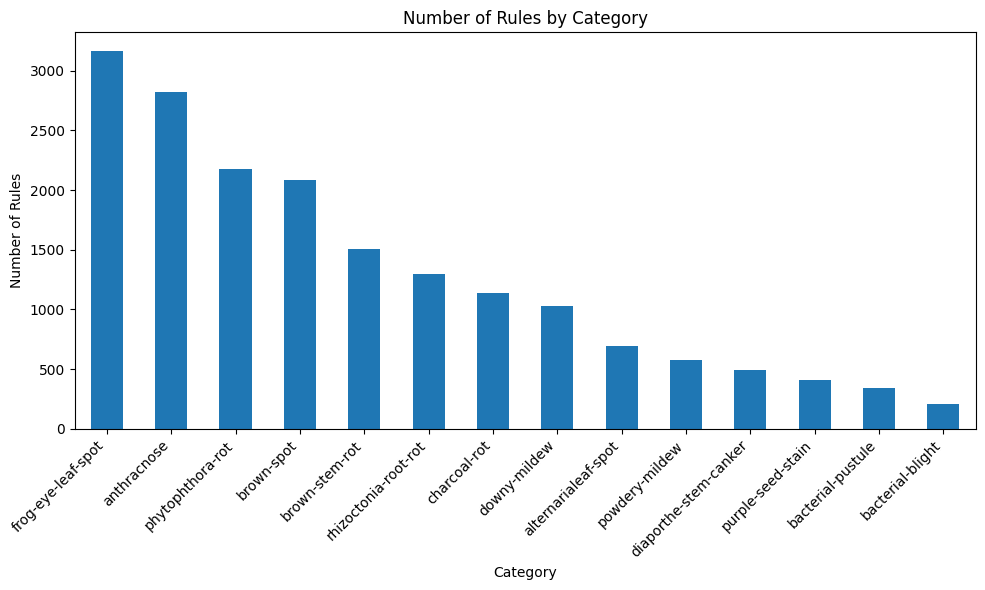

In [6]:
# @title Apriori with Graph

import pandas as pd
import numpy as np
from apyori import apriori
import gc  # Garbage collector

# Load your data efficiently
df_test = pd.read_csv('train_set_with_index.csv', index_col=0)
print(f"Original data shape: {df_test.shape}")

# Replace missing values
df_test.replace(['?', -1], pd.NA, inplace=True)
df_test.dropna(inplace=True)
print(f"Data shape after dropping NA: {df_test.shape}")

# Important: DON'T separate features and target
# Instead, use the full dataset including the category column
data_for_rules = df_test  # Use all columns including 'category'

# Create transaction data format
def create_association_data(df, max_columns=50):
    """Create transaction data for association rule mining with feature=value format"""
    # Select columns with fewer unique values
    column_nunique = {col: df[col].nunique() for col in df.columns}
    sorted_columns = sorted(column_nunique.items(), key=lambda x: x[1])

    # selected_columns = [col for col, nunique in sorted_columns if nunique <= 10]
    selected_columns = [col for col, nunique in sorted_columns]

    if len(selected_columns) > max_columns:
        selected_columns = selected_columns[:max_columns]

    print(f"\nSelected {len(selected_columns)} columns for analysis")

    # Create transaction data for apyori
    transactions = []

    # Process each transaction (row)
    for idx, row in df[selected_columns].iterrows():
        items = []
        for col in selected_columns:
            value = row[col]
            if pd.notna(value):
                item_name = f"{col}={value}"
                items.append(item_name)

        transactions.append(items)

        if idx % 1000 == 0:
            gc.collect()

    return transactions, selected_columns

# Create transaction data with ALL columns including category
transactions, selected_features = create_association_data(data_for_rules)
print(f"Category column included: {'category' in selected_features}")
print(f"Number of transactions: {len(transactions)}")

# HIGH-QUALITY RULE SETTINGS
# -------------------------------

# Set parameters for apyori
min_support = 0.02        # Minimum support threshold
min_confidence = 0.5      # Minimum confidence threshold
min_lift = 2.5         # Minimum lift threshold
max_length = 4            # Maximum length of itemsets

print(f"\nRunning apyori with min_support={min_support}, min_confidence={min_confidence}, min_lift={min_lift}")

# Run apyori algorithm
# Note: apyori returns a generator, so convert to list to process results
results = list(apriori(
    transactions,
    min_support=min_support,
    min_confidence=min_confidence,
    min_lift=min_lift,
    max_length=max_length
))

print(f"Found {len(results)} rule groups")

# Process and format results
all_rules = []
category_rules = []

for result in results:
    items = [x for x in result.items]

    # Get all rules from result
    for rule in result.ordered_statistics:
        items_base = [x for x in rule.items_base]
        items_add = [x for x in rule.items_add]

        # Only proceed if we have items in both antecedent and consequent
        if items_base and items_add:
            # Format the rule
            antecedents = ', '.join(items_base)
            consequents = ', '.join(items_add)

            rule_data = {
                'antecedents': items_base,
                'antecedents_str': antecedents,
                'consequents': items_add,
                'consequents_str': consequents,
                'support': result.support,
                'confidence': rule.confidence,
                'lift': rule.lift,
                'quality_score': result.support * rule.confidence * rule.lift
            }

            all_rules.append(rule_data)

            # Check if any consequent starts with "category="
            if any(item.startswith('category=') for item in items_add) and len(items_add) == 1:
                rule_data['category_value'] = consequents.replace('category=', '')
                category_rules.append(rule_data)

# Convert to DataFrame for easier analysis
if all_rules:
    all_rules_df = pd.DataFrame(all_rules)
    print(f"\nTotal rules found: {len(all_rules_df)}")
else:
    print("No rules found. Try adjusting parameters.")
    all_rules_df = pd.DataFrame()

# Analyze category rules
if category_rules:
    category_rules_df = pd.DataFrame(category_rules)
    print(f"Category-based rules found: {len(category_rules_df)}")

    # Display top rules by quality score
    print("\n=== TOP 10 HIGHEST QUALITY CATEGORY RULES ===")
    pd.set_option('display.max_columns', None)
    top_rules = category_rules_df.sort_values('quality_score', ascending=False).head(10)
    print(top_rules[['antecedents_str', 'category_value', 'support', 'confidence', 'lift', 'quality_score']])

    # Display different perspectives
    print("\n=== HIGHEST CONFIDENCE CATEGORY RULES ===")
    conf_rules = category_rules_df.sort_values('confidence', ascending=False).head(5)
    print(conf_rules[['antecedents_str', 'category_value', 'confidence', 'lift']])

    print("\n=== HIGHEST LIFT CATEGORY RULES ===")
    lift_rules = category_rules_df.sort_values('lift', ascending=False).head(5)
    print(lift_rules[['antecedents_str', 'category_value', 'confidence', 'lift']])

    print("\n=== RULES BY CATEGORY VALUES ===")
    # Group by category value and show top rule for each
    for category, group in category_rules_df.groupby('category_value'):
        top_rule = group.sort_values('quality_score', ascending=False).iloc[0]
        print(f"\nCategory: {category}")
        print(f"Best Rule: {top_rule['antecedents_str']} → {category}")
        print(f"Support: {top_rule['support']:.3f}, Confidence: {top_rule['confidence']:.3f}, Lift: {top_rule['lift']:.3f}")

    # Find rules with multiple items in antecedent (more complex patterns)
    multi_item_rules = category_rules_df[category_rules_df['antecedents'].apply(lambda x: len(x) > 1)]
    if len(multi_item_rules) > 0:
        print("\n=== COMPLEX RULES WITH MULTIPLE ANTECEDENTS ===")
        print(multi_item_rules.sort_values('lift', ascending=False).head(5)[['antecedents_str', 'category_value', 'confidence', 'lift']])

    # Print the consequents for debugging
    print("\n=== CONSEQUENTS OF CATEGORY RULES ===")
    print(category_rules_df['consequents'])

    # Count and display the number of rules for each category
    print("\n=== COUNT OF RULES BY CATEGORY VALUE ===")
    category_counts = category_rules_df['category_value'].value_counts()
    print(category_counts)

    # Visualize the distribution of rules by category (if matplotlib is available)
    try:
        import matplotlib.pyplot as plt

        plt.figure(figsize=(10, 6))
        category_counts.plot(kind='bar')
        plt.title('Number of Rules by Category')
        plt.xlabel('Category')
        plt.ylabel('Number of Rules')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('rules_by_category.png')
        print("\nCategory distribution chart saved as 'rules_by_category.png'")
    except ImportError:
        print("\nMatplotlib not available for visualization. Install with: pip install matplotlib")

    # Convert rules to Prolog format
    print("\n=== CONVERTING RULES TO PROLOG FORMAT ===")

    def convert_apriori_to_prolog(rules_df, output_file="rules.pl", logic_file="prolog_engine.pl"):
        """Convert apriori rules from DataFrame to Prolog rules.

        Args:
            rules_df: DataFrame with the rules
            output_file: File to write only the rules
            logic_file: File to write the backward chaining logic (optional)
        """
        # Write only the rules to the main output file
        with open(output_file, "w") as f:
            f.write("% Apriori rules converted to Prolog format\n")
            f.write("% Format: rule(RuleID, Conditions, CategoryResult).\n\n")

            for idx, rule in rules_df.iterrows():
                rule_id = idx + 1

                # Process antecedents (conditions)
                conditions = []

                for item in rule['antecedents']:
                    if "=" in item:
                        feature, value = item.split("=")

                        # Try to convert value to numeric if possible
                        try:
                            value = float(value)
                            condition = f"'{feature}'=:={value}"  # Default to = for numeric
                        except ValueError:
                            condition = f"'{feature}'=:='{value}'"

                        conditions.append(condition)

                # Get consequent (category)
                category = rule['consequents'][0]

                # Write the rule in Prolog format
                conditions_str = ", ".join(conditions) if conditions else ""
                prolog_rule = f"rule({rule_id}, [{conditions_str}], '{category}')."
                f.write(prolog_rule + "\n")

        # Write the backward chaining logic to a separate file
        if logic_file:
            with open(output_file, "a") as f:
                f.write("""% Step 2: Define a way to check if a fact satisfies conditions

% Base case: empty condition list is always satisfied
satisfies(_, []).

% Recursive case: check each condition in the list
satisfies(Facts, [Condition|Rest]) :-
    check_condition(Facts, Condition),
    satisfies(Facts, Rest).

% Step 3: Define how to check individual conditions
% These will need to be customized based on your actual feature names
check_condition(Facts, Feature > Value) :-
    atom(Feature),  % Make sure Feature is an atom (symbol)
    member(feature(Feature, X), Facts),
    number(X),      % Make sure X is a number
    X > Value.

check_condition(Facts, Feature < Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X < Value.

check_condition(Facts, Feature = Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    X = Value.

check_condition(Facts, Feature >= Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X >= Value.

check_condition(Facts, Feature =< Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X =< Value.

check_condition(Facts, Feature \= Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    X \= Value.

check_condition(Facts, Feature =:= Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X =:= Value.

check_condition(Facts, Feature =<:= Value) :-
    atom(Feature),
    member(feature(Feature, X), Facts),
    number(X),
    X =<:= Value.

% Step 4: Define the classification predicate
% The cut (!) ensures we stop at the first matching rule
classify(Facts, Category, RuleID) :-
    rule(RuleID, Conditions, Category),
    satisfies(Facts, Conditions),
    !.
""")

        print(f"Prolog rules written to {output_file}")
        if logic_file:
            print(f"Prolog backward chaining engine written to {logic_file}")
            print(f"To use in Prolog: consult both files with:")
            print(f"    ?- ['{logic_file}', '{output_file}'].")

    # Execute the conversion
    convert_apriori_to_prolog(category_rules_df, "category_rules.pl", "prolog_engine.pl")
else:
    print("\nNo category-based rules found. Try adjusting parameters.")
    category_rules_df = pd.DataFrame()

In [7]:
print(len(category_rules_df))

17932


In [ ]:
!cp category_rules.pl /content/drive/MyDrive/

In [21]:
def convert_apriori_to_clips(rules_df, output_file="rules_Apriori_CLIPS.clp"):
    """Convert apriori rules from DataFrame to Prolog rules.

    Args:
        rules_df: DataFrame with the rules
        output_file: File to write only the rules
        logic_file: File to write the backward chaining logic (optional)
    """
    # Write only the rules to the main output file
    with open(output_file, "w") as f:
        initial_temp = """(deftemplate feature
  (slot name)
  (slot value))

(deftemplate diagnosis
  (slot name))

(deftemplate log-message
  (slot text))

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
;; Rules
;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
"""
        f.write(initial_temp + '\n')
        for idx, rule in rules_df.iterrows():
            rule_id = idx + 1

            def_rule = f"(defrule rule-{rule_id}"
            # Process antecedents (conditions)
            conditions = []
            feature_id = 1
            for item in rule['antecedents']:
              if "=" in item:
                  feature, value = item.split("=")
                  feature = feature.replace(' ', '-')
                  # Try to convert value to numeric if possible
                  try:
                      value = float(value)
                      condition = f"  (feature (name {feature}) (value ?v{feature_id}&:(= ?v{feature_id} {value})))"
                  except ValueError:
                      condition = f"  (feature (name {feature}) (value ?v{feature_id}&:(= ?v{feature_id} {value})))"

                  conditions.append(condition)
              feature_id += 1

            # Get consequent (category)
            category = rule['consequents'][0]

            # Write the rule in CLIPS format
            conditions_str = "\n".join(conditions) if conditions else ""
            consequent_str = f"""  =>
  (assert (log-message (text "Rule-{rule_id} Fired")))
  (assert (diagnosis (name {category}))))
"""
            clips_rule = f"{def_rule}\n{conditions_str}\n{consequent_str}"
            f.write(clips_rule + "\n")

            rule_id

convert_apriori_to_clips(category_rules_df, "rules_Apriori_CLIPS.clp")

In [24]:
# @title CLIPS Trial TEST
import time
import io
import sys

def test_rules_CLIPS_accuracy(X, y, dt_pl = False):
  diff = 0
  for i in range(1):
    columns = X.columns
    test_examples = []
    correct_cases = 0
    for test_index in range(len(X)):
      from clips import Environment  # Import here to ensure fresh instance per test case
      env = Environment()
      env.clear()  # fully resets the environment
      env.load('rules_Apriori_CLIPS.clp')
      env.reset()
      res = None
      features = []
      for feature_index in range(len(columns)):
        if ' ' in columns[feature_index]:
          feature_name = columns[feature_index].replace(' ', '-')
        else:
          feature_name = columns[feature_index]
        fact_string = f"(feature (name {feature_name}) (value {X.iloc[test_index, feature_index]}))"
        env.assert_string(fact_string)

      start = time.time()
      env.run()
      end = time.time()
      diff += (end - start)
      log_messages = []
      results = []
      for fact in env.facts():
        # print(fact.template.name)
        if fact.template.name == 'log-message':
          log_messages.append(str(fact['text']))
        if fact.template.name == 'diagnosis':
          res = fact['name']
          results.append(res)

      end = time.time()
      diff += (end - start)
      # print(results)
      # print("--- Captured Log Messages ---")
      # print(log_messages) # Will contain ['Rule-1 Fired'] if Rule 1 fired
      # print("-------------------------------------------------")
      if (dt_pl):
        res = res.replace("\"", "").replace('\n','')

      if (res == y.iloc[test_index]):
        # print('Correct')
        correct_cases += 1
      else:
        pass
      print(test_index)
    # break
  return test_examples, correct_cases/len(X), diff

test_examples, correct_perc, diff_time = test_rules_CLIPS_accuracy(X_test, y_test, dt_pl=True)

0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [28]:
!cp rules_Apriori_CLIPS.clp /content/drive/MyDrive/Expert_Systems/reached_results/